# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [3]:
cities

['vuktyl',
 "port saint john's",
 'haiku-pauwela',
 'blackmans bay',
 'aliveri',
 'yellowknife',
 'hawaiian paradise park',
 'port-aux-francais',
 'kirakira',
 'tiksi',
 'waitangi',
 'invercargill',
 'sur',
 'selfoss',
 'uturoa',
 'avarua',
 'makawao',
 'pangkalan brandan',
 'gaitania',
 'taiohae',
 'edinburgh of the seven seas',
 'malvan',
 'puerto ayora',
 'ancud',
 "'ohonua",
 'lata',
 'margaret river',
 'pokachi',
 'erenhot',
 'medicine hat',
 'itupiranga',
 'kill devil hills',
 'tolanaro',
 'pisco',
 'keflavik',
 'newport',
 'bethel',
 'petropavlovsk-kamchatsky',
 'mana',
 'iqaluit',
 'babolsar',
 'kizilcahamam',
 'remire-montjoly',
 'stanley',
 'papatowai',
 'kundiawa',
 'puerto natales',
 'morehead city',
 'adamstown',
 'kodiak',
 'wailua homesteads',
 'grytviken',
 'codrington',
 'okha',
 'college',
 'tsiombe',
 'albany',
 'sokolow podlaski',
 'cabo san lucas',
 'aasiaat',
 'naze',
 'lompoc',
 'arar',
 'talnakh',
 'wanning',
 'polyarnyy',
 'gangneung',
 'acajutla',
 'toga villa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
#     print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#       Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon'] 
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ["wind"]['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vuktyl
Processing Record 2 of Set 1 | port saint john's
Processing Record 3 of Set 1 | haiku-pauwela
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | aliveri
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | sur
Processing Record 14 of Set 1 | selfoss
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | makawao
Processing Record 18 of Set 1 | pangkalan brandan
Processing Record 19 of Set 1 | gaitania
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | edinburgh of the seven seas
P

Processing Record 40 of Set 4 | ndelele
Processing Record 41 of Set 4 | bubaque
Processing Record 42 of Set 4 | st. john's
Processing Record 43 of Set 4 | colon
Processing Record 44 of Set 4 | dickinson
Processing Record 45 of Set 4 | mugia
Processing Record 46 of Set 4 | banda aceh
Processing Record 47 of Set 4 | isafjordur
Processing Record 48 of Set 4 | baiquan
Processing Record 49 of Set 4 | bikenibeu village
Processing Record 0 of Set 5 | georgetown
Processing Record 1 of Set 5 | liwale
Processing Record 2 of Set 5 | port moresby
Processing Record 3 of Set 5 | benguela
Processing Record 4 of Set 5 | badger
Processing Record 5 of Set 5 | gazli
Processing Record 6 of Set 5 | tekane
City not found. Skipping...
Processing Record 7 of Set 5 | kingston
Processing Record 8 of Set 5 | lebyazh'ye
Processing Record 9 of Set 5 | northam
Processing Record 10 of Set 5 | pekanbaru
Processing Record 11 of Set 5 | saint-joseph
Processing Record 12 of Set 5 | usinsk
Processing Record 13 of Set 5 |

Processing Record 34 of Set 8 | lembar
City not found. Skipping...
Processing Record 35 of Set 8 | huarmey
Processing Record 36 of Set 8 | ketchikan
Processing Record 37 of Set 8 | kapa'a
Processing Record 38 of Set 8 | cidreira
Processing Record 39 of Set 8 | mukalla
Processing Record 40 of Set 8 | mount pearl
Processing Record 41 of Set 8 | sao jose da coroa grande
Processing Record 42 of Set 8 | loreto
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | pagar alam
Processing Record 45 of Set 8 | altai
Processing Record 46 of Set 8 | yichang
Processing Record 47 of Set 8 | ad dawadimi
Processing Record 48 of Set 8 | mersa matruh
Processing Record 49 of Set 8 | viedma
Processing Record 0 of Set 9 | onguday
Processing Record 1 of Set 9 | ojuelos de jalisco
Processing Record 2 of Set 9 | valley station
Processing Record 3 of Set 9 | mahibadhoo
Processing Record 4 of Set 9 | lagunas
Processing Record 5 of Set 9 | shohimardon
Processing Record 6 of Set 9 | archbald

Processing Record 22 of Set 12 | adrar
Processing Record 23 of Set 12 | noumea
Processing Record 24 of Set 12 | kenai
Processing Record 25 of Set 12 | porbandar
Processing Record 26 of Set 12 | trujillo
Processing Record 27 of Set 12 | 'ajab shir
City not found. Skipping...
Processing Record 28 of Set 12 | la romana
Processing Record 29 of Set 12 | rakaw
Processing Record 30 of Set 12 | xianyang
Processing Record 31 of Set 12 | itoman
Processing Record 32 of Set 12 | baihe
Processing Record 33 of Set 12 | san miguel de salcedo
Processing Record 34 of Set 12 | syktyvkar
Processing Record 35 of Set 12 | dunedin
Processing Record 36 of Set 12 | alliance
Processing Record 37 of Set 12 | kirsanov
Processing Record 38 of Set 12 | nakonde
Processing Record 39 of Set 12 | druzhkivka
Processing Record 40 of Set 12 | nikolayevsk-on-amure
Processing Record 41 of Set 12 | maintirano
Processing Record 42 of Set 12 | van
Processing Record 43 of Set 12 | sao felix do xingu
Processing Record 44 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vuktyl,63.8567,57.3094,279.17,90,88,2.11,RU,1693152720
1,port saint john's,-31.6229,29.5448,289.53,66,43,0.89,ZA,1693152721
2,haiku-pauwela,20.9219,-156.3051,294.96,80,7,3.13,US,1693152722
3,blackmans bay,-43.0167,147.3167,277.89,92,0,1.91,AU,1693152722
4,aliveri,38.4167,24.0333,307.18,29,90,2.72,GR,1693152722


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vuktyl,63.8567,57.3094,279.17,90,88,2.11,RU,1693152720
1,port saint john's,-31.6229,29.5448,289.53,66,43,0.89,ZA,1693152721
2,haiku-pauwela,20.9219,-156.3051,294.96,80,7,3.13,US,1693152722
3,blackmans bay,-43.0167,147.3167,277.89,92,0,1.91,AU,1693152722
4,aliveri,38.4167,24.0333,307.18,29,90,2.72,GR,1693152722


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

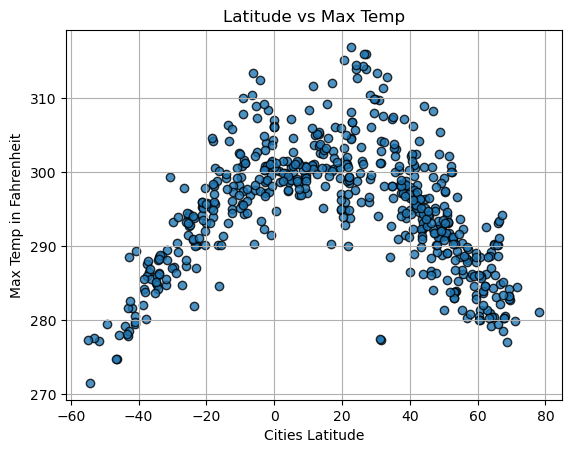

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title('Latitude vs Max Temp')
plt.xlabel('Cities Latitude')
plt.ylabel('Max Temp in Fahrenheit')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

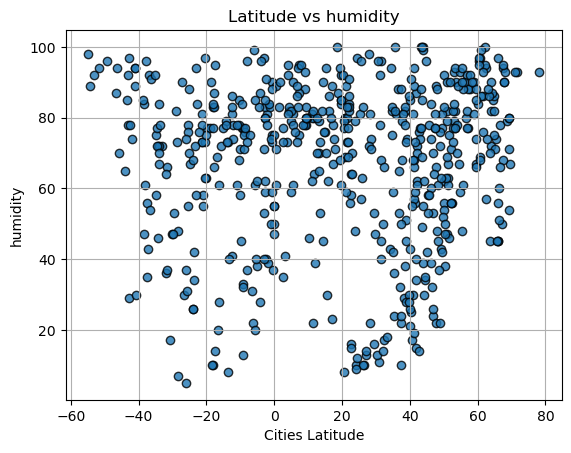

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title('Latitude vs humidity')
plt.xlabel('Cities Latitude')
plt.ylabel('humidity')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

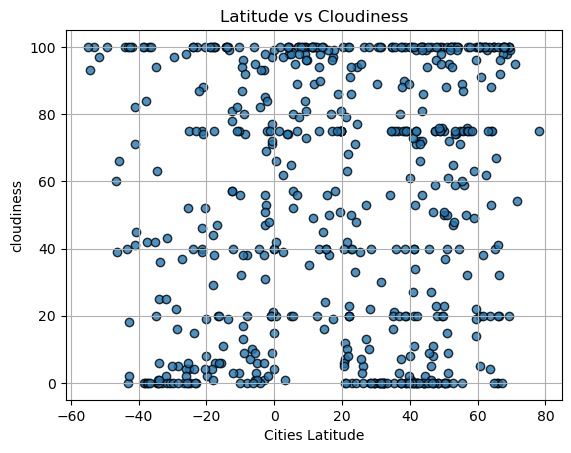

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
plt.title('Latitude vs Cloudiness')
plt.xlabel('Cities Latitude')
plt.ylabel('cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

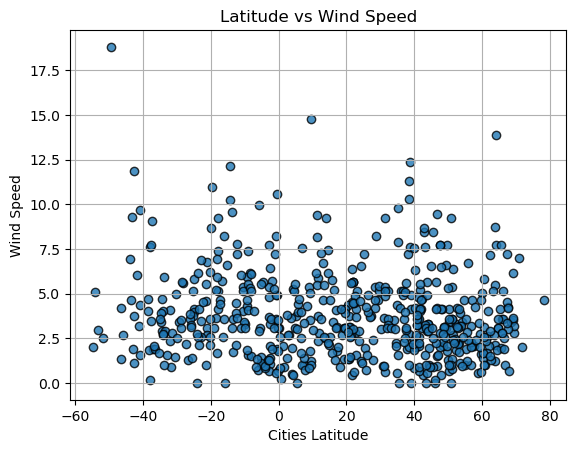

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed')
plt.xlabel('Cities Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linregress(x, y):
    x = x.values 
    model = linregress(x,y)
    slope = model.slope
    intercept = model.intercept
    r = model.rvalue
    x_vals = np.linspace(min(x), max(x),2)
    plt.plot(x_vals, x_vals * slope + intercept, "r", label= "y = " + str(slope) + "x + "+ str(intercept))
    plt.scatter(x,y)
    plt.legend()
    plt.show()
    print(f"R-value is {r}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vuktyl,63.8567,57.3094,279.17,90,88,2.11,RU,1693152720
2,haiku-pauwela,20.9219,-156.3051,294.96,80,7,3.13,US,1693152722
4,aliveri,38.4167,24.0333,307.18,29,90,2.72,GR,1693152722
5,yellowknife,62.4560,-114.3525,286.24,94,100,7.15,CA,1693152608
6,hawaiian paradise park,19.5933,-154.9731,294.84,92,75,3.09,US,1693152723


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port saint john's,-31.6229,29.5448,289.53,66,43,0.89,ZA,1693152721
3,blackmans bay,-43.0167,147.3167,277.89,92,0,1.91,AU,1693152722
7,port-aux-francais,-49.3500,70.2167,279.56,96,100,18.82,TF,1693152723
8,kirakira,-10.4544,161.9205,298.34,85,100,4.05,SB,1693152723
10,waitangi,-43.9535,-176.5597,279.16,65,100,6.94,NZ,1693152724


###  Temperature vs. Latitude Linear Regression Plot

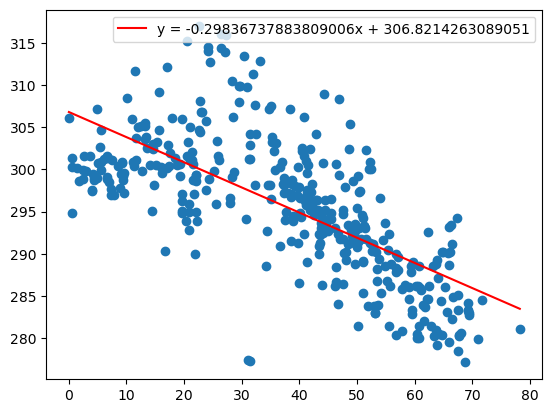

R-value is -0.6949669850432861


In [16]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

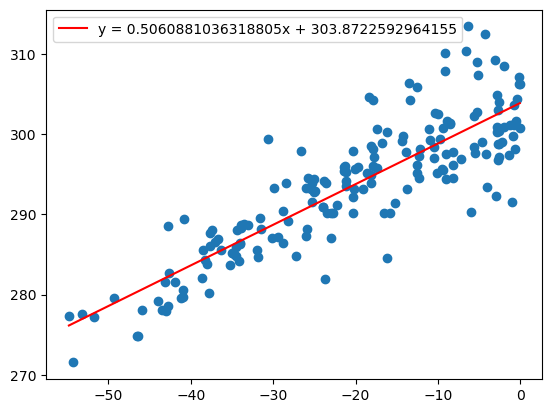

R-value is 0.8616287175707099


In [17]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** We can see that the closer we get to the equator that the Max Tempeture seems to increase. we can concluded this becuase there is negative correlation between lat and temp in the northern hemisphere and then we can a postitive correlation between the lat and temp in the southern hemisphere 

### Humidity vs. Latitude Linear Regression Plot

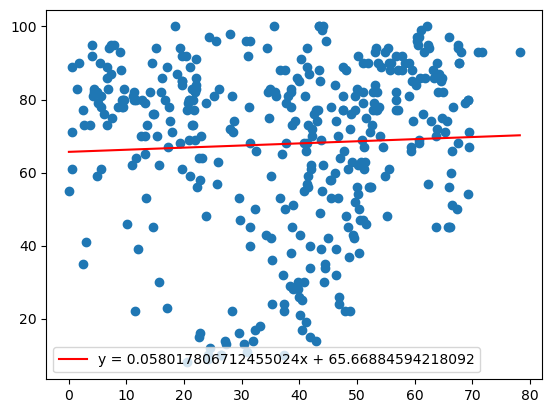

R-value is 0.0481931967049043


In [18]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

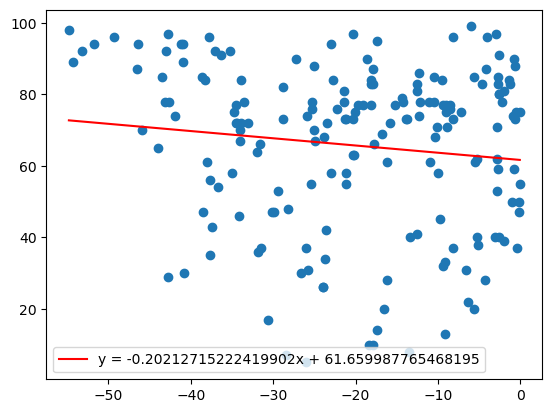

R-value is -0.1254197591379874


In [19]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** looking at the correction between the Humidity and the latitude bewteen the northern and southern hemisphere that the humidity increases the further away you move from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

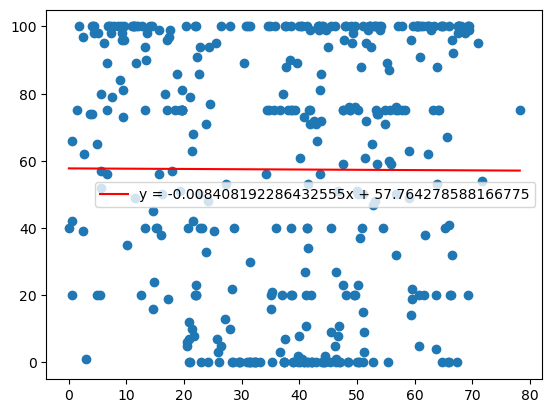

R-value is -0.00421015514034333


In [20]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

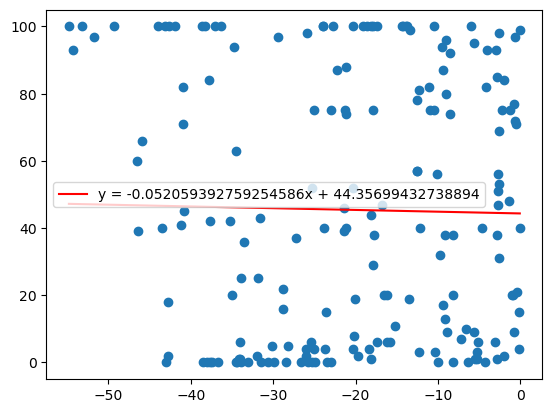

R-value is -0.01928544522773852


In [21]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** the slope for the linear regression for both norther and southern hemisphere are negative/ 

### Wind Speed vs. Latitude Linear Regression Plot

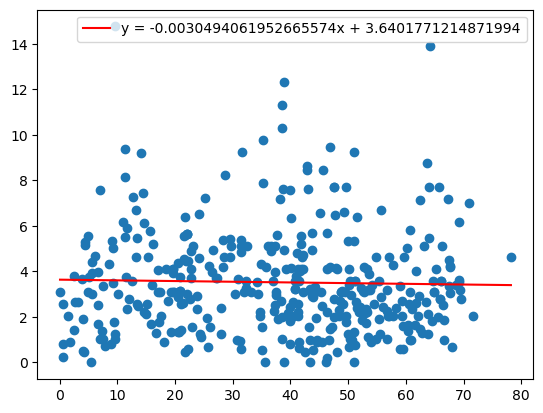

R-value is -0.025594760467154632


In [22]:
# Northern Hemisphere
plot_linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

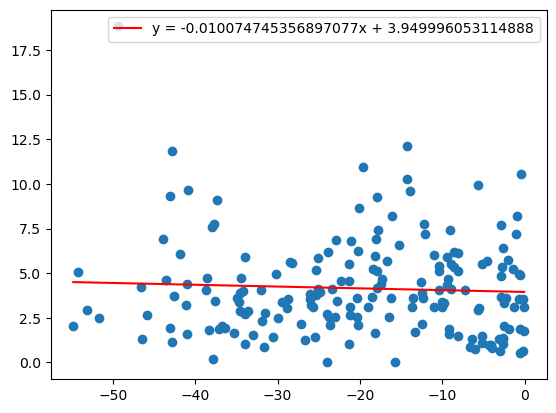

R-value is -0.05316931819182159


In [23]:
# Southern Hemisphere
plot_linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** Both the northern and southern Hemisphere seem to have a strong linerar correcation. 